In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print("Class labels:", np.unique(y))

Class labels: [0 1 2]


利用`sklearn`库中的`model_selection`模块的`train_test_split`函数，将$X$和$y$阵列随机分为$30\%$的测试数据（$45$个样本）和$70\%$的训练数据（$105$个样本）

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print("Labels counts in y:", np.bincount(y))
print("Labels counts in y_train:", np.bincount(y_train))
print("Lables counts in y_test:", np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Lables counts in y_test: [15 15 15]


利用`sklearn`中的预处理模块`preprocessing`中的类`StandardScaler`来对特征进行标准化

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

利用sklearn训练感知器`Perceptron`

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 1


调用`metrics`模块来查看性能指标，例如计算测试集上感知器的分类准确度

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

# 可以综合调用predict和accuracy_score计算出分类器的预测准确度
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.98
Accuracy: 0.98


In [13]:
from utils.plot_decision_regions import plot_decision_regions

d:\Code\Python\Python_Machine_Learning_Code\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


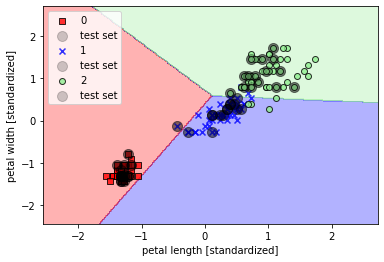

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc='upper left')
plt.show()